<a href="https://colab.research.google.com/github/MangeshGawas/All_About_Python_AI_ML/blob/main/core_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

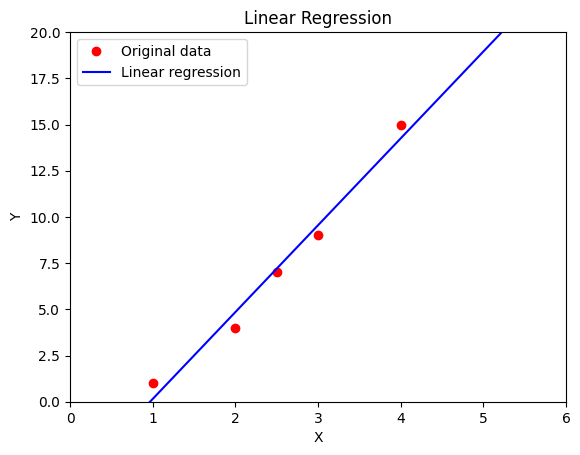

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#data points
x = np.array([1, 2, 2.5, 3, 4])
y = np.array([1, 4, 7, 9, 15])

#Perform linear regression
slope, intercept = np.polyfit(x, y, 1)

# Create the line of best fit
x_fit = np.linspace(0, 6, 100)
y_fit = slope * x_fit + intercept

# Plot the original data points
plt.plot(x, y, 'ro', label='Original data')

# Plot the regression line
plt.plot(x_fit, y_fit, 'b-', label='Linear regression')

# Set the axis limits
plt.axis([0, 6, 0, 20])

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression')

# Show the plot
plt.show()


# using Sklearn


In [9]:
!pip install sklean

ERROR: Could not find a version that satisfies the requirement sklean (from versions: none)
ERROR: No matching distribution found for sklean


In [6]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [35]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
print(dftrain.head())
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


In [15]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [22]:
for column in dftrain.columns:
    unique_values = dftrain[column].unique()
    print(f"{column}: {unique_values}")

sex: ['male' 'female']
age: [22.   38.   26.   35.   28.    2.   27.   14.    4.   20.   39.   31.
 19.   40.   66.   42.    3.   18.    7.   49.   29.   65.   21.   28.5
 11.   45.   17.   32.   25.    0.83 30.   16.   23.   24.   46.   59.
 71.   34.   33.   37.   47.   14.5  70.5  32.5   9.   51.   55.5  40.5
 44.    1.   50.   36.   58.   20.5  41.   63.   43.   61.   15.   60.
 64.    5.   52.   48.   56.    0.75 54.   62.   53.   57.   80.    6.
 70.   30.5  10.   34.5 ]
n_siblings_spouses: [1 0 3 4 2 5 8]
parch: [0 1 2 5 3 4]
fare: [  7.25    71.2833   7.925   53.1      8.4583  21.075   11.1333  30.0708
  16.7      8.05    31.275    7.8542  29.125   13.      18.       7.225
  26.      35.5     31.3875 263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292  11.2417   9.475   21.
  41.5792  15.5     21.6792  17.8     39.6875  76.7292  61.9792  46.9
  80.      83.475   27.9     15.2458   8.1583   8.6625  73.5     56.4958
   7.65    29.      12.47

In [23]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


In [24]:
dftrain.describe()


,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [25]:
dftrain.shape

(627, 9)

<Axes: >

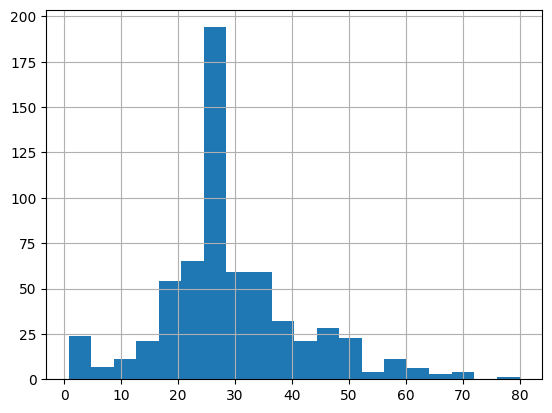

In [26]:
dftrain.age.hist(bins=20)

<Axes: xlabel='sex'>

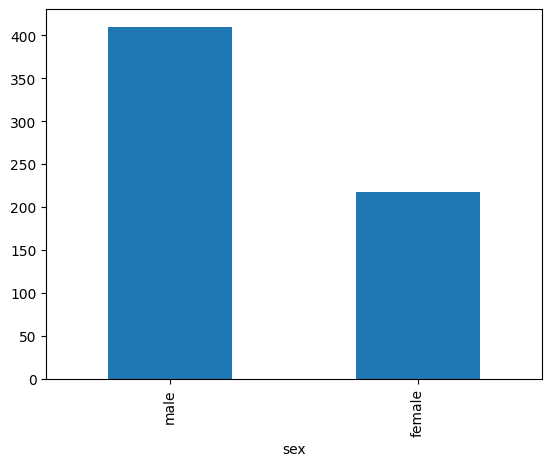

In [31]:
dftrain.sex.value_counts().plot(kind='bar')

<Axes: ylabel='class'>

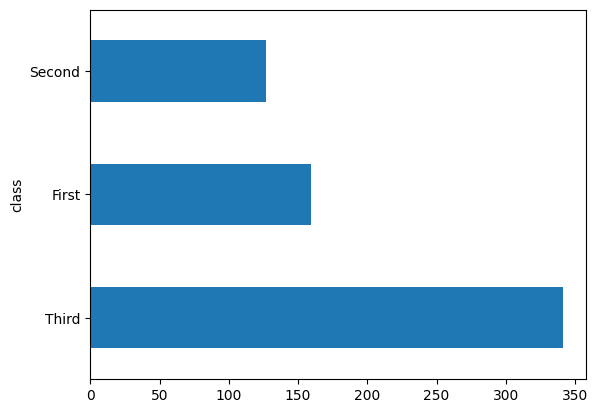

In [33]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

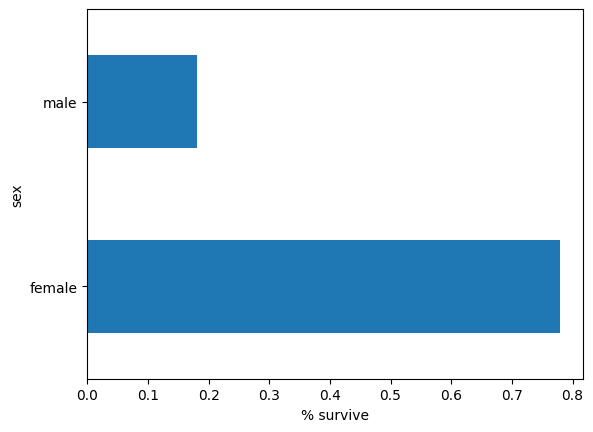

In [36]:
pd.concat([dftrain,y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')